In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  Credit card fraud detection

Exploratory data analysis, Visual representations, outliers, imputations, correlation, imbalanced dataset, sampling, random, SMOTE, feature engineering, PCA, Classifiers, SVM, decision trees, XGBoost, logistic regression, accuracy and scores. Clustering


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from scipy.stats import pearsonr
from scipy import stats
from sklearn.svm import LinearSVC
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
from sklearn.metrics import roc_auc_score
import gc, sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [ ]:
df= pd.read_csv('creditcard.csv')

### Exploratory Data Analysis

In [ ]:
df.shape

(140703, 31)

In [ ]:
print("There are "+str(len(df))+ "  Rows and "+str(len(df.columns)) + "  columns in the given dataset" )


There are 140703  Rows and 31  columns in the given dataset


### Visual Representation

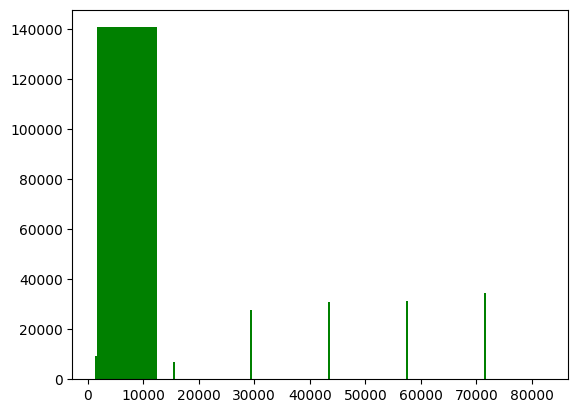

In [ ]:
plt.hist(df, 6, histtype='bar', facecolor='g')
plt.show()

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,140703.000000,140703.000000,140703.000000,140703.000000,140703.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,...,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000,140702.000000
mean,52017.063240,-0.249590,0.018631,0.672709,0.139629,-0.282394,0.079221,-0.117074,0.065108,-0.092798,...,-0.039490,-0.118699,-0.033307,0.011971,0.130149,0.023568,0.000598,0.002314,91.113847,0.001876
std,20935.874366,1.815360,1.612924,1.267514,1.321903,1.306687,1.283716,1.166104,1.230387,1.088043,...,0.721606,0.635249,0.591371,0.595799,0.437282,0.491940,0.388942,0.306960,247.063579,0.043276
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,38001.000000,-1.020857,-0.563417,0.169911,-0.713458,-0.903456,-0.661857,-0.603665,-0.130976,-0.714885,...,-0.226122,-0.548084,-0.171745,-0.325037,-0.136357,-0.326105,-0.060363,-0.004166,6.000000,0.000000
50%,53833.000000,-0.270868,0.105003,0.750128,0.167426,-0.314577,-0.176481,-0.064121,0.080542,-0.155239,...,-0.059815,-0.095822,-0.044999,0.068728,0.166478,-0.064879,0.011792,0.023610,23.900000,0.000000
75%,69573.000000,1.157957,0.777163,1.362846,0.992618,0.237702,0.465523,0.409937,0.375410,0.481411,...,0.113589,0.300817,0.083280,0.408711,0.418682,0.286656,0.087069,0.077145,80.910000,0.000000
max,83879.000000,1.960497,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


<ipython-input-531-14412076448d>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0],kde=True)
<ipython-input-531-14412076448d>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1],kde=True)


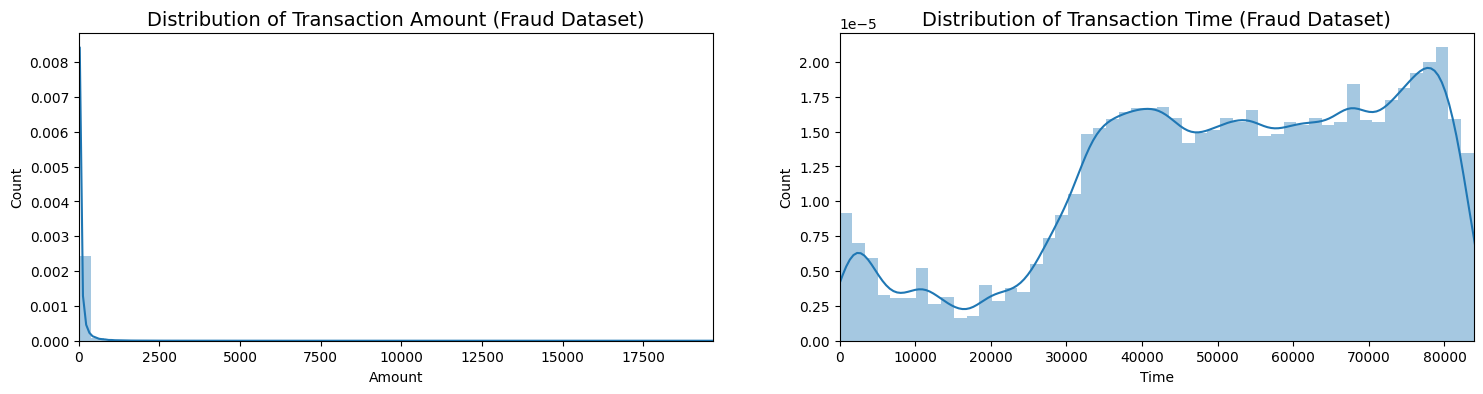

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0],kde=True)
ax[0].set_title('Distribution of Transaction Amount (Fraud Dataset)', fontsize=14)
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Count')
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1],kde=True)
ax[1].set_title('Distribution of Transaction Time (Fraud Dataset)', fontsize=14)
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Count')
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

### Expunging Duplicated Values





In [ ]:
df[df['Class']==0].duplicated().sum()


524

In [ ]:
df[df['Class']==1].duplicated().sum()

5

In [ ]:
df[df['Class']==1].shape


(264, 31)

In [ ]:
df[df['Class']==0].shape

(140438, 31)

In [ ]:
df=df.drop('Time',axis=1)

In [ ]:
duplicate_rows = df.duplicated()
duplicate_df = df[duplicate_rows]
print(duplicate_df)

              V1        V2        V3        V4        V5        V6        V7  \
33     -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223  0.711206   
35     -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983  0.693039   
113     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
114     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
115     1.038370  0.127486  0.184456  1.109950  0.441699  0.945283 -0.036715   
...          ...       ...       ...       ...       ...       ...       ...   
140498  1.027614 -0.423542  1.181828  0.732695 -0.944257  0.488845 -0.809057   
140549  1.143327 -0.405490 -0.348017  0.191804  1.510709  4.070529 -1.097001   
140560  1.194223  0.162089  0.136983  0.461421 -0.073478 -0.119071 -0.184026   
140633  1.170943  0.628200 -0.253306  1.385773  0.041673 -0.979345  0.187290   
140640  1.230983 -0.224520 -0.345196  0.212802  1.586953  3.997378 -1.145351   

              V8        V9       V10  .

In [ ]:
df=df.drop_duplicates()

The StandardScaler class is used for standardizing features by removing the mean and scaling them to unit variance.

In [ ]:
sc=StandardScaler()

In [ ]:
df['Amount']=sc.fit_transform(df[['Amount']])

<ipython-input-540-0e78177c1afa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount']=sc.fit_transform(df[['Amount']])


<Axes: xlabel='Class', ylabel='count'>

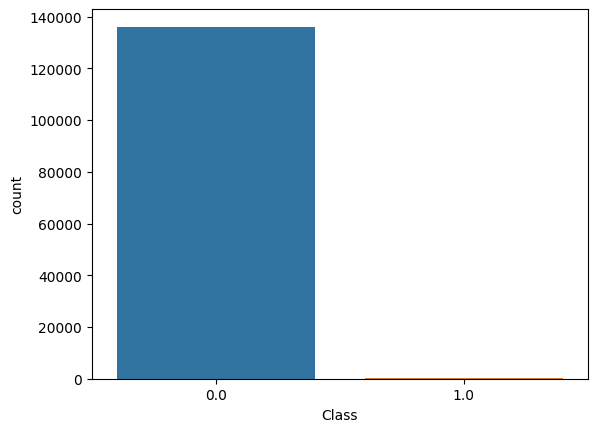

In [ ]:
# '0' = Non-fraud , '1' = fraud
sns.countplot(x='Class',data=df)

In [ ]:
## taking independent and dependent variable
y=df['Class']
x=df.drop('Class',axis=1)


### Managing NAN values!!

In [ ]:
# dropping NAN values(1 NAN value found)
y.fillna(y.median().round(1), inplace=True)

In [ ]:
x.fillna(x.median().round(1), inplace=True)

In [ ]:
x.shape

(136354, 29)

### Correlations

In [ ]:
cormat = df.corr()
round(cormat,2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.00,0.01,0.21,-0.05,-0.00,0.05,0.08,-0.02,-0.06,0.00,...,-0.01,-0.06,-0.09,-0.03,0.20,0.01,-0.02,0.15,-0.24,-0.12
V2,0.01,1.00,-0.09,0.04,-0.03,0.02,-0.02,0.01,0.00,0.03,...,-0.04,-0.01,0.02,-0.02,-0.10,-0.03,0.00,0.02,-0.55,0.10
V3,0.21,-0.09,1.00,-0.07,0.19,-0.06,0.18,-0.11,0.10,0.07,...,0.05,0.24,0.04,0.04,-0.19,0.03,-0.05,0.03,-0.23,-0.27
V4,-0.05,0.04,-0.07,1.00,0.02,-0.03,-0.00,0.03,0.05,-0.09,...,0.02,0.04,-0.01,0.01,-0.00,-0.03,0.03,-0.01,0.09,0.14
V5,-0.00,-0.03,0.19,0.02,1.00,0.03,-0.03,-0.02,0.03,0.05,...,-0.04,-0.09,0.01,-0.03,-0.03,-0.04,-0.01,-0.01,-0.40,-0.12
V6,0.05,0.02,-0.06,-0.03,0.03,1.00,0.04,-0.05,0.04,-0.02,...,0.00,0.06,-0.02,-0.03,0.04,0.01,-0.02,-0.01,0.21,-0.06
V7,0.08,-0.02,0.18,-0.00,-0.03,0.04,1.00,0.02,0.04,0.04,...,0.04,-0.07,0.06,0.01,-0.10,-0.03,-0.08,-0.04,0.38,-0.21
V8,-0.02,0.01,-0.11,0.03,-0.02,-0.05,0.02,1.00,-0.00,-0.02,...,0.11,0.01,-0.02,0.00,0.01,0.01,0.01,0.01,-0.09,0.08
V9,-0.06,0.00,0.10,0.05,0.03,0.04,0.04,-0.00,1.00,-0.03,...,0.02,0.05,-0.05,0.01,0.13,0.11,-0.00,-0.02,-0.02,-0.10
V10,0.00,0.03,0.07,-0.09,0.05,-0.02,0.04,-0.02,-0.03,1.00,...,-0.01,-0.06,-0.01,0.00,0.03,-0.01,-0.03,-0.02,-0.13,-0.24


In [ ]:
 #correaltion with absolute values
corr = df.corr().abs()
corr.style.background_gradient(cmap='coolwarm')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000,0.011872,0.211166,0.049485,0.002616,0.047762,0.080536,0.022918,0.059750,0.002269,0.011516,0.019593,0.003454,0.024427,0.042977,0.008857,0.026293,0.009828,0.006662,0.052178,0.006680,0.058306,0.088612,0.026402,0.199177,0.011970,0.017621,0.151742,0.236164,0.124724
V2,0.011872,1.000000,0.090044,0.036072,0.034869,0.017536,0.015215,0.013965,0.003299,0.027915,0.022707,0.005574,0.034552,0.007181,0.082359,0.039424,0.052478,0.020720,0.008703,0.077276,0.040027,0.012894,0.022795,0.017251,0.095870,0.031393,0.003209,0.023065,0.550122,0.100901
V3,0.211166,0.090044,1.000000,0.068584,0.189129,0.063514,0.179319,0.112490,0.097517,0.065236,0.066204,0.057760,0.058333,0.035164,0.184925,0.063886,0.075263,0.028126,0.026917,0.103300,0.053398,0.237348,0.035244,0.040885,0.185115,0.034706,0.051365,0.033024,0.234396,0.268010
V4,0.049485,0.036072,0.068584,1.000000,0.017032,0.026199,0.002920,0.033896,0.048101,0.085548,0.002816,0.040435,0.015392,0.002238,0.028490,0.072201,0.011574,0.036914,0.026220,0.016710,0.023517,0.041944,0.009875,0.005329,0.002697,0.031635,0.032727,0.006193,0.094549,0.144495
V5,0.002616,0.034869,0.189129,0.017032,1.000000,0.032354,0.031827,0.022727,0.026837,0.049174,0.013018,0.020192,0.047389,0.028287,0.107771,0.102364,0.057592,0.032538,0.023591,0.037977,0.036692,0.091102,0.012255,0.033969,0.027606,0.044148,0.012343,0.010703,0.396942,0.122445
V6,0.047762,0.017536,0.063514,0.026199,0.032354,1.000000,0.039128,0.054819,0.038891,0.020922,0.090156,0.015939,0.017623,0.023087,0.128251,0.028871,0.008213,0.041874,0.092603,0.039572,0.002503,0.058719,0.018286,0.032471,0.036327,0.011149,0.016959,0.006139,0.210293,0.058115
V7,0.080536,0.015215,0.179319,0.002920,0.031827,0.039128,1.000000,0.020525,0.040164,0.041902,0.006733,0.043298,0.025684,0.005687,0.087433,0.061203,0.005922,0.027771,0.034028,0.049487,0.044070,0.066443,0.064654,0.005808,0.097538,0.027877,0.078974,0.039791,0.375957,0.207689
V8,0.022918,0.013965,0.112490,0.033896,0.022727,0.054819,0.020525,1.000000,0.000208,0.017964,0.002760,0.043593,0.001704,0.038581,0.044043,0.049578,0.030797,0.021118,0.031766,0.045635,0.106479,0.005866,0.015663,0.004315,0.011993,0.009871,0.011916,0.013245,0.090713,0.078582
V9,0.059750,0.003299,0.097517,0.048101,0.026837,0.038891,0.040164,0.000208,1.000000,0.027793,0.020394,0.002231,0.041882,0.005408,0.112141,0.051875,0.070995,0.042530,0.015441,0.032532,0.017192,0.050556,0.050910,0.013275,0.132039,0.107862,0.002154,0.024486,0.018524,0.102146
V10,0.002269,0.027915,0.065236,0.085548,0.049174,0.020922,0.041902,0.017964,0.027793,1.000000,0.025688,0.000990,0.000512,0.049695,0.059122,0.056874,0.090540,0.052361,0.009223,0.003481,0.011106,0.064133,0.007510,0.000851,0.030120,0.014795,0.029484,0.019184,0.128156,0.237797


<Axes: >

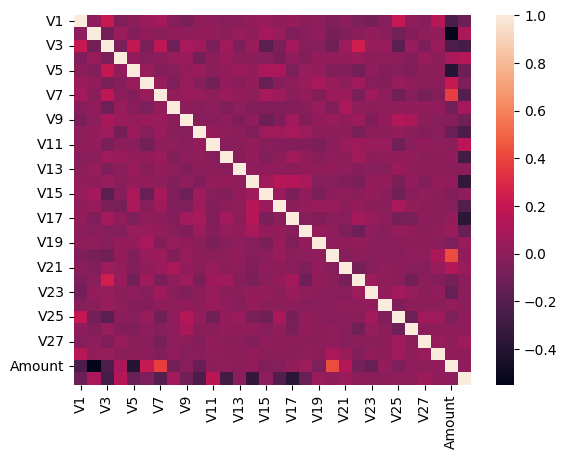

In [ ]:
sns.heatmap(cormat)

### SMOTE

 SMOTE  is a popular method used to address class imbalance in datasets, particularly in the context of binary classification tasks.

In [ ]:
sm = SMOTE()

In [ ]:
#Taking small dataset initially
x= x.iloc[0:40000,]
y= y.iloc[0:40000,]

In [ ]:
x_res,y_res=sm.fit_resample(x,y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [ ]:
#Random Forest Classifier
model1 = RandomForestClassifier()


In [ ]:
#Decision Tree Classifier
model2 =  tree.DecisionTreeClassifier()

In [ ]:
#Logistic Regression
model3 = LogisticRegression()

In [ ]:
#XG Boost
model4 = XGBClassifier()


### Training Models


### ***without SMOTE***

In [ ]:
model1.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
model3.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model4.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Accuracy Scores and reports

In [ ]:
model1.score(x_test, y_test)

0.99975

In [ ]:
model2.score(x_test, y_test)

0.999625

In [ ]:
model3.score(x_test, y_test)

0.998125

In [ ]:
model4.score(x_test, y_test)

0.99975

In [ ]:
y_pred1= model1.predict(x_test)

In [ ]:
y_pred2= model2.predict(x_test)

In [ ]:
y_pred3= model3.predict(x_test)

In [ ]:
y_pred4= model4.predict(x_test)

In [ ]:
report1=classification_report(y_test,y_pred1)

In [ ]:
report2=classification_report(y_test,y_pred2)

In [ ]:
report3=classification_report(y_test,y_pred3)

In [ ]:
report4= classification_report(y_test, y_pred4)

In [ ]:
print(report1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7979
         1.0       1.00      0.90      0.95        21

    accuracy                           1.00      8000
   macro avg       1.00      0.95      0.97      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
print(report2)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7979
         1.0       1.00      0.86      0.92        21

    accuracy                           1.00      8000
   macro avg       1.00      0.93      0.96      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
print(report3)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7979
         1.0       0.65      0.62      0.63        21

    accuracy                           1.00      8000
   macro avg       0.82      0.81      0.82      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
print(report4)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7979
         1.0       1.00      0.90      0.95        21

    accuracy                           1.00      8000
   macro avg       1.00      0.95      0.97      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
accuracy_score(y_test, y_pred1)

0.99975

In [ ]:
accuracy_score(y_test, y_pred2)

0.999625

In [ ]:
accuracy_score(y_test, y_pred3)


0.998125

In [ ]:
accuracy_score(y_test, y_pred4)

0.99975

###***With SMOTE***

In [ ]:
model1.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
model2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
model3.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model4.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
model1.score(x_test, y_test)

1.0

In [ ]:
model2.score(X_test, Y_test)

0.998809374608347

In [ ]:
model3.score(X_test, Y_test)

0.9785687429502444

In [ ]:
model4.score(X_test, Y_test)

0.9997493420228099

In [ ]:
Y_pred1= model1.predict(X_test)

In [ ]:
Y_pred2= model2.predict(X_test)

In [ ]:
Y_pred3= model3.predict(X_test)

In [ ]:
Y_pred4= model4.predict(X_test)

In [ ]:
Report1=classification_report(Y_test,Y_pred1)

In [ ]:
Report2=classification_report(Y_test,Y_pred2)

In [ ]:
Report3=classification_report(Y_test,Y_pred3)

In [ ]:
Report4=classification_report(Y_test,Y_pred4)

In [ ]:
print(Report1)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7982
         1.0       1.00      1.00      1.00      7976

    accuracy                           1.00     15958
   macro avg       1.00      1.00      1.00     15958
weighted avg       1.00      1.00      1.00     15958



In [ ]:
print(Report2)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7982
         1.0       1.00      1.00      1.00      7976

    accuracy                           1.00     15958
   macro avg       1.00      1.00      1.00     15958
weighted avg       1.00      1.00      1.00     15958



In [ ]:
print(Report3)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      7982
         1.0       0.98      0.97      0.98      7976

    accuracy                           0.98     15958
   macro avg       0.98      0.98      0.98     15958
weighted avg       0.98      0.98      0.98     15958



In [ ]:
print(Report4)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7982
         1.0       1.00      1.00      1.00      7976

    accuracy                           1.00     15958
   macro avg       1.00      1.00      1.00     15958
weighted avg       1.00      1.00      1.00     15958



In [ ]:
accuracy_score(Y_test, Y_pred1)

0.9998120065171074

In [ ]:
accuracy_score(Y_test, Y_pred2)

0.998809374608347

In [ ]:
accuracy_score(Y_test, Y_pred3)

0.9785687429502444

In [ ]:
accuracy_score(Y_test, Y_pred4)

0.9997493420228099

### Support Vector Machine model with Scikit-Learn

SVM is a powerful and widely used machine learning algorithm for both classification and regression tasks.

In [ ]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

In [ ]:
t0 = time.time()
sklearn_svm.fit(x_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  8.08


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
prediction=sklearn_svm.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, prediction)
print("Accuracy:", accuracy)

confusion_matrix = confusion_matrix(y_test, prediction)
print("Confusion Matrix:")
print(confusion_matrix)


Accuracy: 0.944
Confusion Matrix:
[[7533  446]
 [   2   19]]


### Classifier

KNN is a simple and effective classification algorithm that predicts the class of a sample based on the majority class among its k nearest neighbors in the feature space.



In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
KNN_prediction = KNN_model.predict(x_test)

In [ ]:
print(accuracy_score(KNN_prediction, y_test))

0.9995


In [ ]:
print(classification_report(KNN_prediction, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7983
         1.0       0.81      1.00      0.89        17

    accuracy                           1.00      8000
   macro avg       0.90      1.00      0.95      8000
weighted avg       1.00      1.00      1.00      8000



### PCA

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
pca = PCA()

pca.fit(X_scaled)

PCA()

After fitting the PCA model to the scaled data using pca.fit(X_scaled), We can access the 'explained_variance_ratio_' attribute to obtain the variance explained by each principal component. The explained_variance_ratio_ attribute is a numpy array that contains the percentage of variance explained by each principal component in descending order.

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

 Ploting the cumulative explained variance ratio for each principal component. This plot is a useful visualization to help you understand how much variance is retained as you increase the number of principal components.

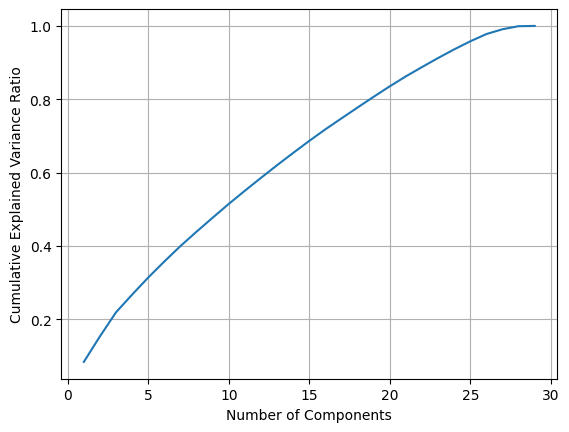

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

We have used the transformed principal components obtained from PCA to reduce the number of dimensions in your dataset to 'n_components = 2'. This step retains only the first n_components principal components, effectively reducing the dimensionality of the dataset.

In [ ]:
n_components = 2
X_transformed = pca.transform(X_scaled)[:, :n_components]

In [ ]:
knn_without_pca = KNeighborsClassifier()
knn_without_pca.fit(x_train, y_train)
accuracy_without_pca = knn_without_pca.score(x_test, y_test)

print("Accuracy without PCA:", accuracy_without_pca)

Accuracy without PCA: 0.9995


In [ ]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

knn_with_pca = KNeighborsClassifier()
knn_with_pca.fit(x_train_pca, y_train_pca)
accuracy_with_pca = knn_with_pca.score(x_test_pca, y_test_pca)

print("Accuracy with PCA:", accuracy_with_pca)

Accuracy with PCA: 0.998375
